In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [97]:
df = pd.read_csv('../datasets/possum.csv')

In [98]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [100]:
df.Pop.value_counts()

Pop
other    58
Vic      46
Name: count, dtype: int64

In [101]:
population = pd.get_dummies(df['Pop'])
df = pd.concat([df, population], axis=1)
df = df.drop('Pop', axis=1)

In [102]:
sex_d = pd.get_dummies(df['sex'])
df = pd.concat([df, sex_d], axis=1)
df = df.drop('sex', axis=1)

In [103]:
df.head()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Vic,other,f,m
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,True,False,False,True
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,True,False,True,False
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,True,False,True,False
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,True,False,True,False
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,True,False,True,False


In [104]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [105]:
df.isnull().sum()

case        0
site        0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
Vic         0
other       0
f           0
m           0
dtype: int64

In [106]:
df.fillna(df.mean(),inplace=True)

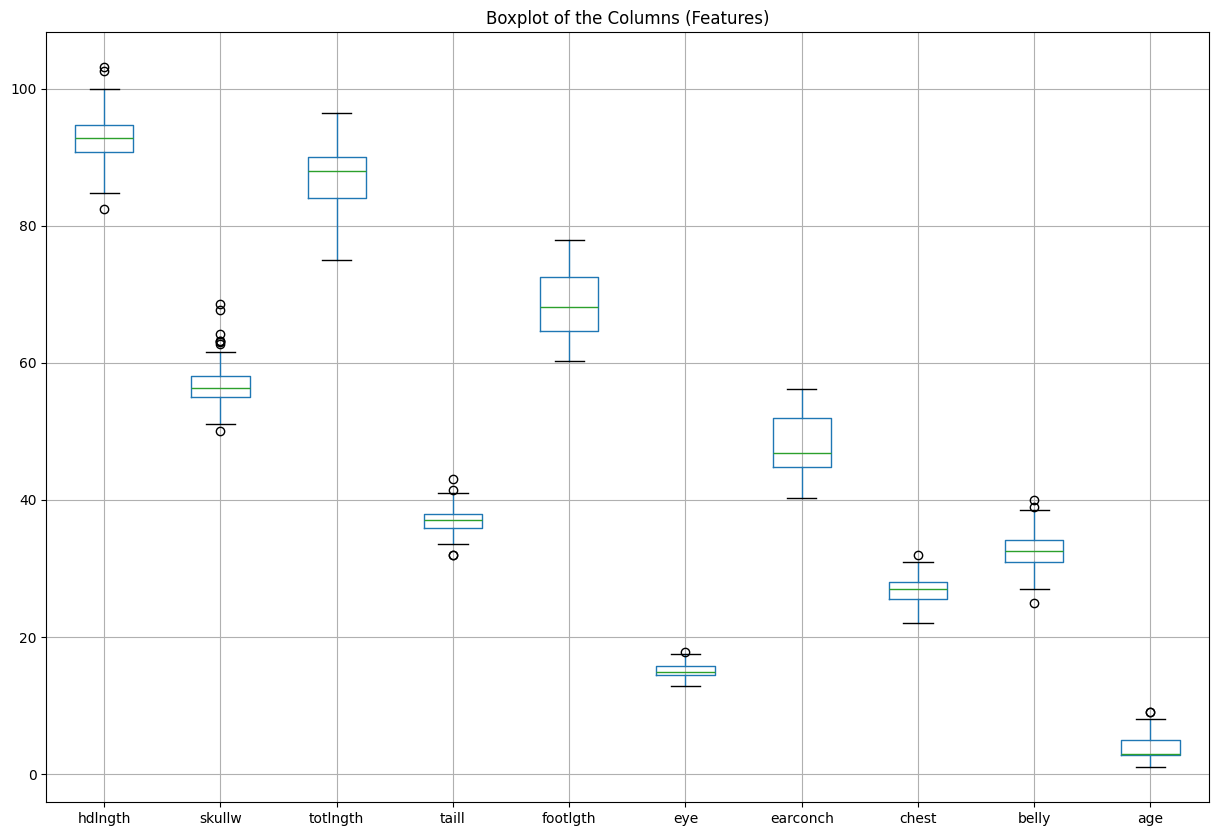

Total of 18 outliers detected. Data has been scaled.
[[ 0.42099587  1.13488322  0.44560337 -0.51773159  1.38777887  0.14717724
   1.55743067  0.49122226  1.24187379  2.2145383 ]
 [-0.02893164  0.23119716  1.02838444 -0.26133118  0.92830852  0.91249886
   0.75050101  0.73683338  0.15042415  1.15155991]
 [ 0.3928754   1.00578521  1.96083415  1.02067085  1.59454052  0.43417284
   0.92166791  1.47366677  0.5142407   1.15155991]
 [ 0.16791165  0.06982464  1.14494065  0.50787004  1.75535514  0.14717724
   0.99502515  0.49122226  0.5142407   1.15155991]
 [-0.31013633 -0.18837137 -0.37029013 -0.51773159  0.58370577  0.05151203
   1.23954929  0.73683338  0.15042415 -0.97439685]]


In [112]:
plt.figure(figsize=(15, 10))
plt.title("Boxplot of the Columns (Features)")

X = df[['hdlngth','skullw','totlngth','taill','footlgth','eye', 'earconch' ,'chest','belly','age']]

X.boxplot()

plt.show()


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()


if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Total of {outliers} outliers detected. Data has been scaled.")
    print(X_scaled[:5])
else:
    print("No outliers detected.")

In [116]:
X = df.drop('age', axis=1)
y = df['age']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [117]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [119]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [122]:
def calc_scores(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

r2, mse = calc_scores(lr, x_train, y_train)

print("R² score on the training dataset: ", r2)
print("MSE on the training dataset: ", mse)

R² score on the training dataset:  0.2607320864112379
MSE on the training dataset:  2.3920356464987065


In [123]:
lasso_lr = Lasso(alpha=0.5)
lasso_lr.fit(x_train, y_train)


lasso_lr_low_alpha = Lasso(alpha=0.1)
lasso_lr_low_alpha.fit(x_train, y_train)


lasso_lr_high_alpha = Lasso(alpha=2)
lasso_lr_high_alpha.fit(x_train, y_train)


Lasso(alpha=2)

Coefficients of the variables in the sklearn:  [-1.14781416  1.12420397  0.54542126  0.19943039  0.08353264  0.239199
 -1.24751975 -0.43026956  0.18143569 -0.20377063  0.34671005  0.85460693
 -0.85460693  0.03913625 -0.03913625]


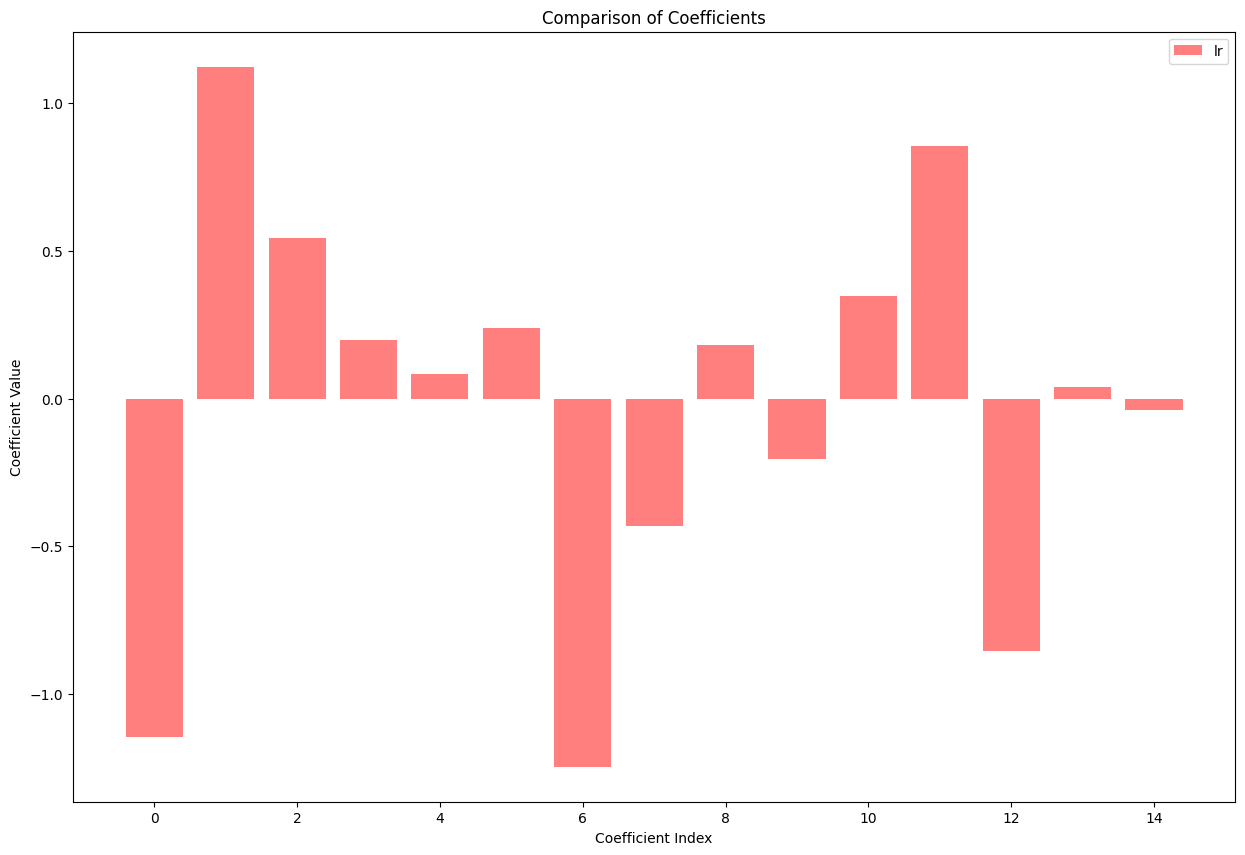

Coefficients of the variables in the sklearn:  [-0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.]


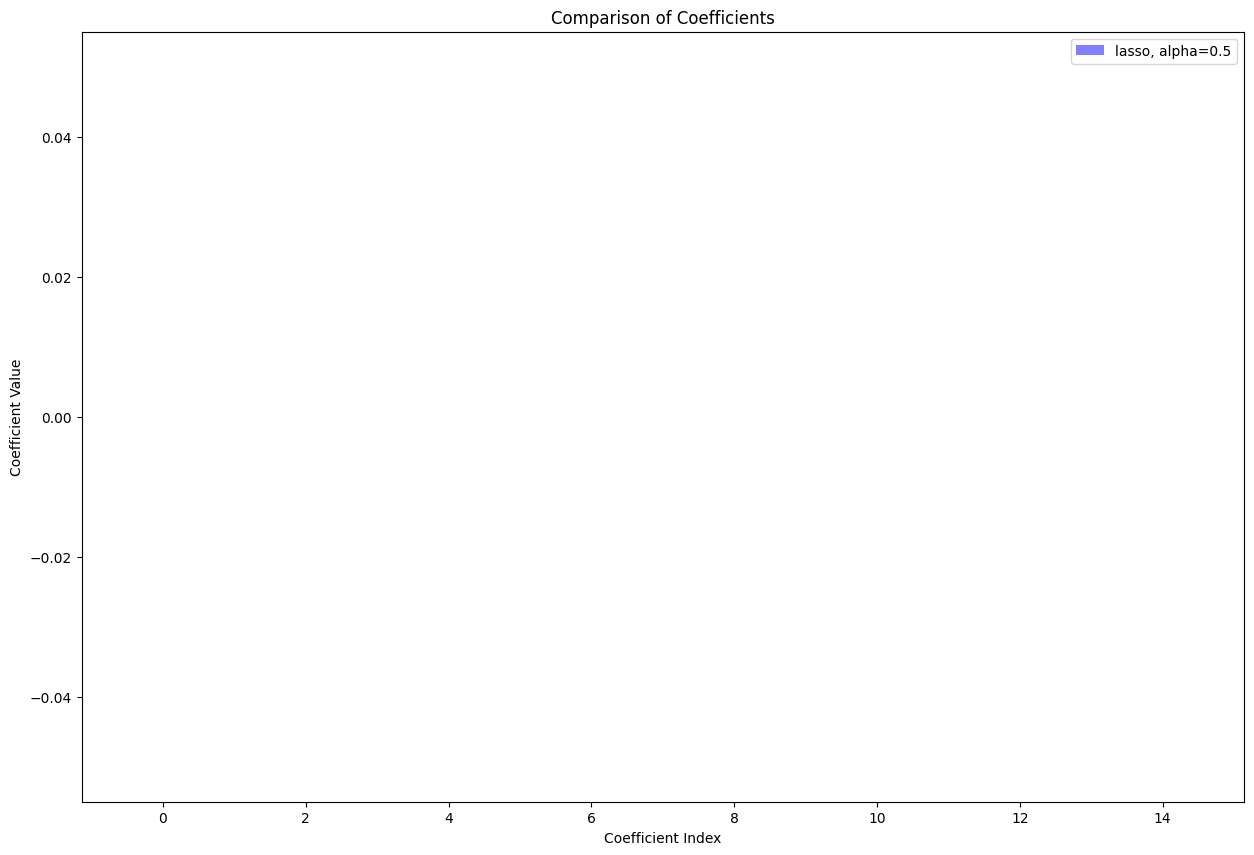

Coefficients of the variables in the sklearn:  [-1.90094424e-01 -0.00000000e+00  1.33494784e-01  0.00000000e+00
  1.63629096e-02  0.00000000e+00 -1.17916331e-01 -0.00000000e+00
  2.05512386e-01  0.00000000e+00  2.44907917e-01  0.00000000e+00
 -0.00000000e+00  8.57655511e-02 -6.42056689e-17]


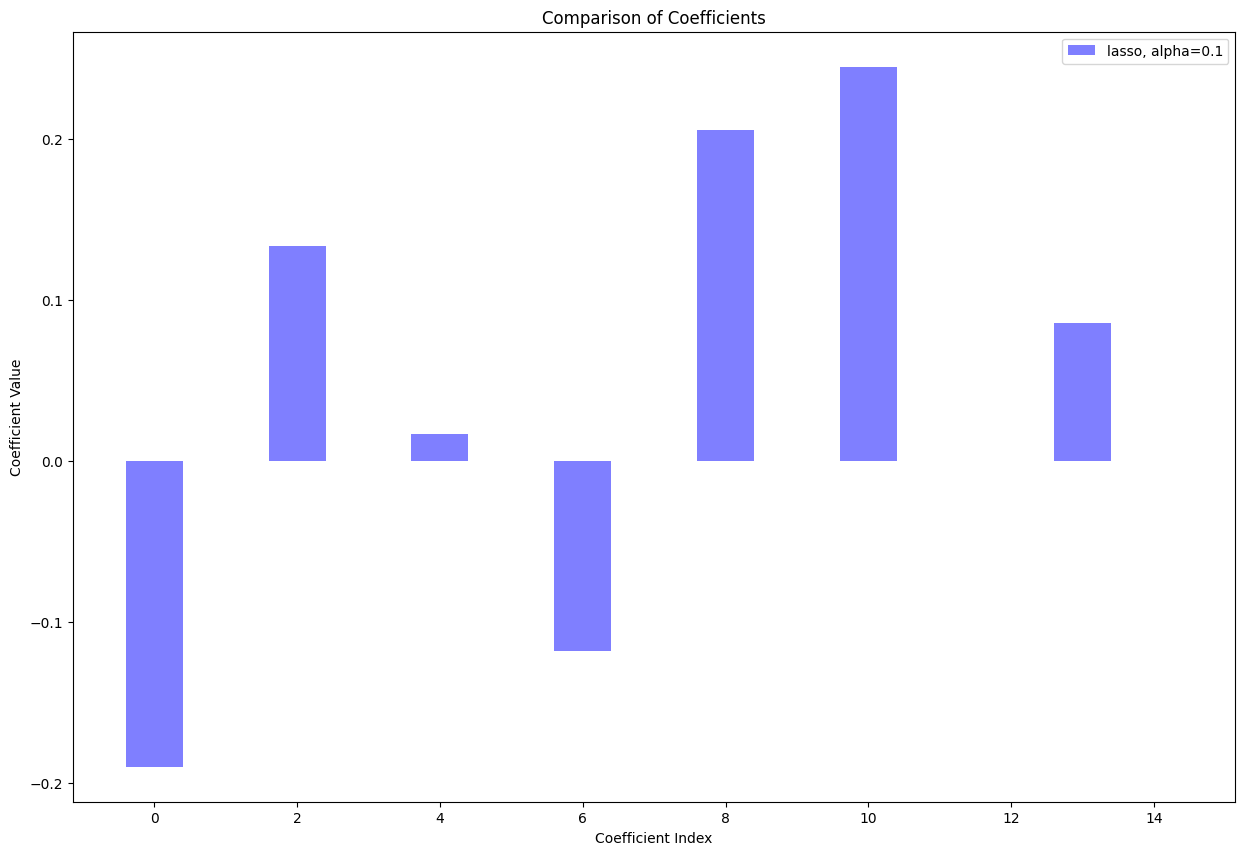

Coefficients of the variables in the sklearn:  [-0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.]


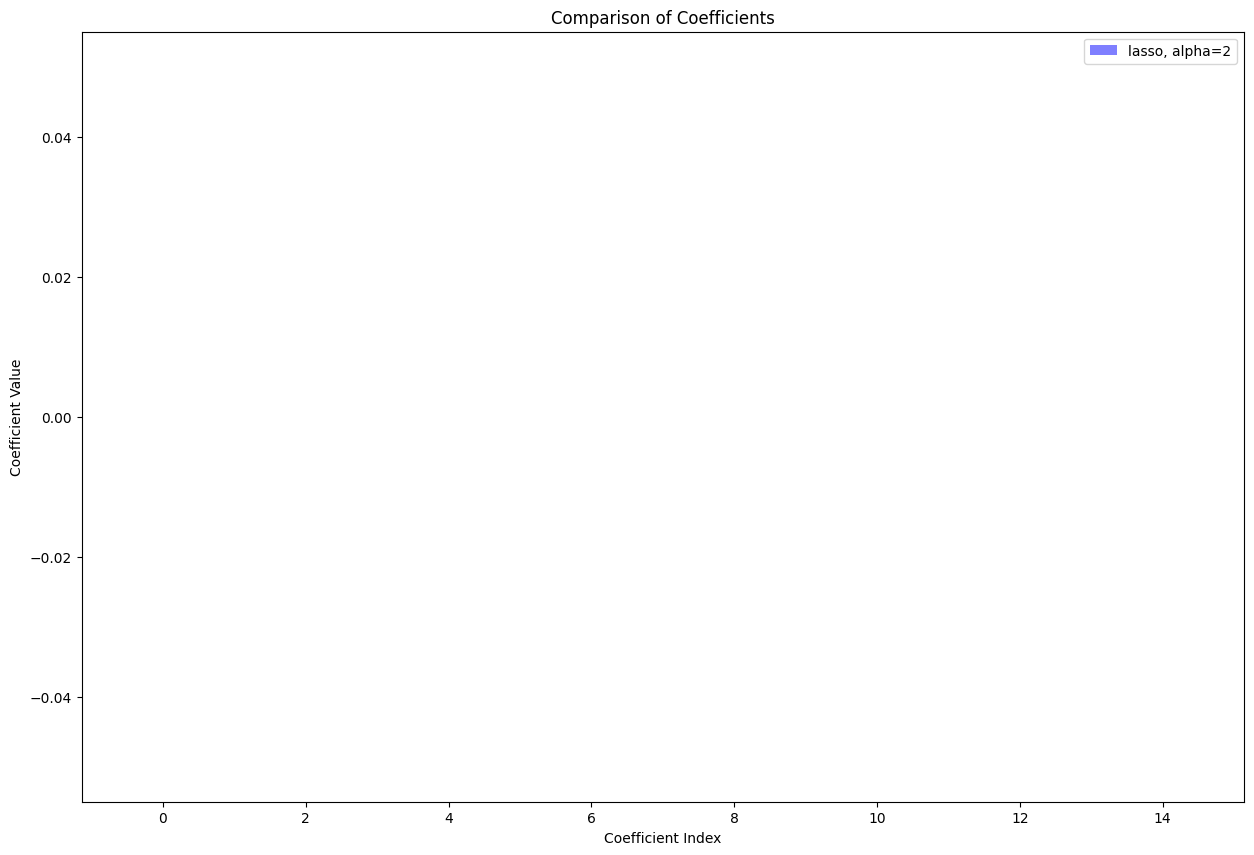

In [124]:
def visualize_coef(model, label, color):
    print("Coefficients of the variables in the sklearn: ", model.coef_)

    plt.figure(figsize=(15, 10))
    plt.bar(range(len(model.coef_)), model.coef_, label=label, color=color, alpha=0.5)
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Value")
    plt.title("Comparison of Coefficients")
    plt.legend()
    
    plt.show()
    
visualize_coef(lr, "lr", "r")
visualize_coef(lasso_lr, "lasso, alpha=0.5", "b")
visualize_coef(lasso_lr_low_alpha, "lasso, alpha=0.1", "b")
visualize_coef(lasso_lr_high_alpha, "lasso, alpha=2", "b")


In [125]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)


Cross-validated MSE for different alphas: {0.1: 0.525189779583452, 1: 0.5327274418960584, 10: 0.5490780616453839, 100: 0.5498922450764758}


In [126]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)

Cross-validated MSE for different alphas: {0.1: 0.5575047321890108, 1: 0.5992634940733625, 10: 0.6219820450337376, 100: 0.6223301833315054}


In [128]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8)
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lr.predict(x_test))

1.8365298572815334

Coefficients of the variables in the sklearn:  [-2.48860099e-11  2.58593205e+01 -3.23131905e+00 -4.64916096e+00
  2.43332309e+00 -1.87319557e+01  1.22859325e+01  3.75721279e+01
  2.04487320e+01 -6.42635118e+00  2.58831242e+00  1.43187567e+01
  1.05654023e+00 -1.05654023e+00  1.57305919e-02 -1.57305919e-02
 -1.29314944e+01  3.14143692e+01 -1.10934428e+01 -2.92755858e+01
 -2.36356394e+00 -3.44906189e+01  1.33812487e+01 -3.07484569e+01
 -4.25325432e+00  5.65086970e+01 -1.35941571e+01  8.46571545e+00
  1.68103862e+01  6.80064219e+00  1.65702196e+01 -1.50802496e+01
 -9.12351044e+00 -4.78267905e+01  2.78235115e+01  5.97642125e+00
 -1.78301003e+01  3.16258275e+01  4.54964038e+01 -7.90225739e+00
 -2.21866682e+01 -4.59564917e+00 -1.57619000e+00 -6.35770076e-01
 -2.39147732e+00  3.01863448e+01  2.66320543e+01  4.24866773e+00
  4.26804029e+00 -2.73012549e+01  1.67798315e+01 -6.03419726e+01
  2.68474842e+01 -4.99118858e+01 -1.28654237e+01  1.25594212e+01
  2.28297792e+00 -2.64108749e+00  1.6573957

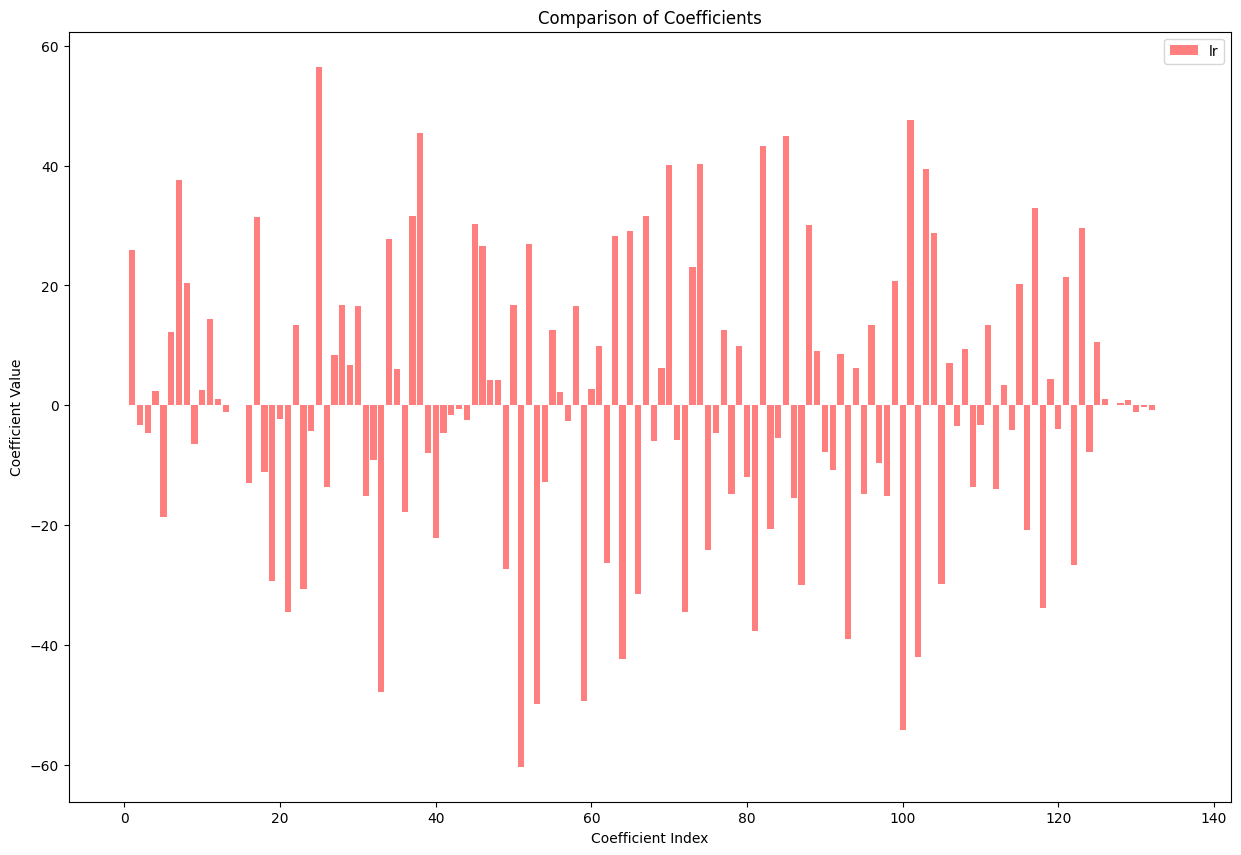

In [129]:
visualize_coef(lr, "lr", "r")

In [130]:
lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lasso.predict(x_test))

0.6704606654954631